GRIP - The Sparks Foundation

Task 7 : Stock Market Prediction using Numerical and Textual Analysis

Objectif : Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.

Name : Kacem Rania

#Importing libraries

In [139]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [140]:
headlines=pd.read_csv("india-news-headlines.csv")

In [141]:
headlines.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


#Analyzing the news headlines Datataset

In [142]:
headlines.shape

(3650970, 3)

In [143]:
headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB


In [144]:
headlines.duplicated().sum()


24860

In [145]:
headlines = headlines.drop_duplicates(keep='first')

In [146]:
headlines.duplicated().sum()

0

In [147]:
headlines.shape

(3626110, 3)

In [148]:
headlines.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [149]:

headlines['headline_category'].value_counts()

india                      296887
unknown                    202837
city.mumbai                149728
city.delhi                 137185
business.india-business    120434
                            ...  
stats.trivia                    6
editorialt                      5
ringtones                       3
news-features                   3
2011-top-stories                2
Name: headline_category, Length: 1041, dtype: int64

In [150]:
headlines['publish_date'] = pd.to_datetime(headlines['publish_date'],format='%Y%m%d')
headlines = headlines.rename(columns={'publish_date':'Date'})
headlines.tail()

,Date,headline_category,headline_text
3650965,2022-03-31,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,2022-03-31,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,2022-03-31,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,2022-03-31,city.erode,Tamil Nadu sees marginal rise of Covid cases w...
3650969,2022-03-31,city.salem,Tamil Nadu sees marginal rise of Covid cases w...


In [151]:
headlines = headlines[headlines['Date'] >= '2008-09-15']
headlines = headlines[headlines['Date'] <= '2008-09-30' ]
headlines.shape

(6666, 3)

In [152]:
headlines = headlines.sort_values('Date')

In [153]:
headlines = headlines.drop('headline_category',axis=1)

In [154]:
headlines

,Date,headline_text
618726,2008-09-15,Pregnant? Watch your weight!
619035,2008-09-15,Two killed; one injured in Mumbai hit-and-run ...
619034,2008-09-15,Sridhar opts out of Asian circuit
619033,2008-09-15,Manuel Almunia
619032,2008-09-15,Emmanuel Adebayor
...,...,...
625290,2008-09-30,Blame the brats; not the car
625289,2008-09-30,Youngest Sept 27 blast victim shifted to AIIMS
625288,2008-09-30,India; EU voice concern over security threat i...
625296,2008-09-30,Tight security for festive month


In [155]:
headlines.reset_index()

,index,Date,headline_text
0,618726,2008-09-15,Pregnant? Watch your weight!
1,619035,2008-09-15,Two killed; one injured in Mumbai hit-and-run ...
2,619034,2008-09-15,Sridhar opts out of Asian circuit
3,619033,2008-09-15,Manuel Almunia
4,619032,2008-09-15,Emmanuel Adebayor
...,...,...,...
6661,625290,2008-09-30,Blame the brats; not the car
6662,625289,2008-09-30,Youngest Sept 27 blast victim shifted to AIIMS
6663,625288,2008-09-30,India; EU voice concern over security threat i...
6664,625296,2008-09-30,Tight security for festive month


In [156]:
#Number of words in each headline text
headlines['word_count'] = headlines['headline_text'].apply(lambda x : len(str(x).split(' ')))
headlines.head()

,Date,headline_text,word_count
618726,2008-09-15,Pregnant? Watch your weight!,4
619035,2008-09-15,Two killed; one injured in Mumbai hit-and-run ...,8
619034,2008-09-15,Sridhar opts out of Asian circuit,6
619033,2008-09-15,Manuel Almunia,2
619032,2008-09-15,Emmanuel Adebayor,2


In [157]:
#Number of characters in each headline text
headlines['char_count'] = headlines['headline_text'].str.len()
headlines.head()

,Date,headline_text,word_count,char_count
618726,2008-09-15,Pregnant? Watch your weight!,4,28
619035,2008-09-15,Two killed; one injured in Mumbai hit-and-run ...,8,50
619034,2008-09-15,Sridhar opts out of Asian circuit,6,33
619033,2008-09-15,Manuel Almunia,2,14
619032,2008-09-15,Emmanuel Adebayor,2,17


#Preprocess the news headline Data

In [158]:
#Converting every word to lower case
headlines['headline_text'] = headlines['headline_text'].apply(lambda x : ' '.join(x.lower() for x in x.split()))
headlines['headline_text']

618726                         pregnant? watch your weight!
619035    two killed; one injured in mumbai hit-and-run ...
619034                    sridhar opts out of asian circuit
619033                                       manuel almunia
619032                                    emmanuel adebayor
                                ...                        
625290                         blame the brats; not the car
625289       youngest sept 27 blast victim shifted to aiims
625288    india; eu voice concern over security threat i...
625296                     tight security for festive month
625534    sparkling opening of 39-room hotel at baga in goa
Name: headline_text, Length: 6666, dtype: object

In [159]:
#Removing punctuations
headlines['headline_text'] = headlines['headline_text'].str.replace('[^\w\s]','')
headlines['headline_text']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


618726                           pregnant watch your weight
619035      two killed one injured in mumbai hitandrun case
619034                    sridhar opts out of asian circuit
619033                                       manuel almunia
619032                                    emmanuel adebayor
                                ...                        
625290                          blame the brats not the car
625289       youngest sept 27 blast victim shifted to aiims
625288    india eu voice concern over security threat in...
625296                     tight security for festive month
625534     sparkling opening of 39room hotel at baga in goa
Name: headline_text, Length: 6666, dtype: object

In [160]:
#Removing stopwords
sw = stopwords.words('english')
headlines['headline_text'] = headlines['headline_text'].apply(lambda x : ' '.join(x for x in x.split() if x not in sw))
headlines['headline_text']

618726                           pregnant watch weight
619035    two killed one injured mumbai hitandrun case
619034                      sridhar opts asian circuit
619033                                  manuel almunia
619032                               emmanuel adebayor
                              ...                     
625290                                 blame brats car
625289     youngest sept 27 blast victim shifted aiims
625288      india eu voice concern security threat pak
625296                    tight security festive month
625534         sparkling opening 39room hotel baga goa
Name: headline_text, Length: 6666, dtype: object

In [161]:
#Number of words in each headline text
headlines['word_count'] = headlines['headline_text'].apply(lambda x : len(str(x).split(' ')))
headlines.head()

,Date,headline_text,word_count,char_count
618726,2008-09-15,pregnant watch weight,3,28
619035,2008-09-15,two killed one injured mumbai hitandrun case,7,50
619034,2008-09-15,sridhar opts asian circuit,4,33
619033,2008-09-15,manuel almunia,2,14
619032,2008-09-15,emmanuel adebayor,2,17


In [162]:
#Counting commun words
freq_comm = pd.Series(' '.join(headlines['headline_text']).split()).value_counts()[:10]
freq_comm

india     190
us        154
delhi     139
new       133
terror    127
govt      114
cops      108
rs        100
may        97
get        93
dtype: int64

In [163]:
#Removing commun words
freq = list(freq_comm.index)
headlines['headline_text'] = headlines['headline_text'].apply(lambda x : ' '.join(x for x in x.split() if x not in freq))
headlines['headline_text']

618726                           pregnant watch weight
619035    two killed one injured mumbai hitandrun case
619034                      sridhar opts asian circuit
619033                                  manuel almunia
619032                               emmanuel adebayor
                              ...                     
625290                                 blame brats car
625289     youngest sept 27 blast victim shifted aiims
625288            eu voice concern security threat pak
625296                    tight security festive month
625534         sparkling opening 39room hotel baga goa
Name: headline_text, Length: 6666, dtype: object

In [164]:
#Counting rare words
freq_rare = pd.Series(' '.join(headlines['headline_text']).split()).value_counts()[-50:]
freq_rare.head()

dying         1
emami         1
bookstores    1
bie           1
jittery       1
dtype: int64

In [165]:
#Removing rare words
freq = list(freq_rare.index)
headlines['headline_text'] = headlines['headline_text'].apply(lambda x : ' '.join(x for x in x.split() if x not in freq_rare))
headlines['headline_text']

618726                           pregnant watch weight
619035    two killed one injured mumbai hitandrun case
619034                      sridhar opts asian circuit
619033                                  manuel almunia
619032                               emmanuel adebayor
                              ...                     
625290                                 blame brats car
625289     youngest sept 27 blast victim shifted aiims
625288            eu voice concern security threat pak
625296                    tight security festive month
625534         sparkling opening 39room hotel baga goa
Name: headline_text, Length: 6666, dtype: object

In [166]:
#Tokenization
TextBlob(str(headlines['headline_text'])).words

WordList(['618726', 'pregnant', 'watch', 'weight', '619035', 'two', 'killed', 'one', 'injured', 'mumbai', 'hitandrun', 'case', '619034', 'sridhar', 'opts', 'asian', 'circuit', '619033', 'manuel', 'almunia', '619032', 'emmanuel', 'adebayor', '625290', 'blame', 'brats', 'car', '625289', 'youngest', 'sept', '27', 'blast', 'victim', 'shifted', 'aiims', '625288', 'eu', 'voice', 'concern', 'security', 'threat', 'pak', '625296', 'tight', 'security', 'festive', 'month', '625534', 'sparkling', 'opening', '39room', 'hotel', 'baga', 'goa', 'Name', 'headline_text', 'Length', '6666', 'dtype', 'object'])

In [167]:
#Stemming
ps = PorterStemmer()
headlines['headline_text'].apply(lambda x : ' '.join(ps.stem(word) for word in x.split()))

618726                       pregnant watch weight
619035    two kill one injur mumbai hitandrun case
619034                   sridhar opt asian circuit
619033                              manuel almunia
619032                           emmanuel adebayor
                            ...                   
625290                              blame brat car
625289    youngest sept 27 blast victim shift aiim
625288            eu voic concern secur threat pak
625296                    tight secur festiv month
625534           sparkl open 39room hotel baga goa
Name: headline_text, Length: 6666, dtype: object

# Performing sentiment analysis for each headline text

Functions to get the subjectivity and polarity

In [194]:
headlines['sentiment'] = headlines['headline_text'].apply(lambda x : TextBlob(x).sentiment[0])
headlines[['headline_text','sentiment']]

,headline_text,sentiment
0,pregnant watch weight,0.333333
1,two killed one injured mumbai hitandrun case,-0.200000
2,sridhar opts asian circuit,0.000000
3,manuel almunia,0.000000
4,emmanuel adebayor,0.000000
...,...,...
6661,blame brats car,0.000000
6662,youngest sept 27 blast victim shifted aiims,-0.075000
6663,eu voice concern security threat pak,0.000000
6664,tight security festive month,-0.178571


In [169]:
headlines = headlines[['Date','headline_text','sentiment']].reset_index()
headlines = headlines.drop('index',axis=1)
headlines.head()

,Date,headline_text,sentiment
0,2008-09-15,pregnant watch weight,0.333333
1,2008-09-15,two killed one injured mumbai hitandrun case,-0.200000
2,2008-09-15,sridhar opts asian circuit,0.000000
3,2008-09-15,manuel almunia,0.000000
4,2008-09-15,emmanuel adebayor,0.000000


#Analysing historical market prices Dataset


In [170]:
#Historical stock prices Dataset
prices = pd.read_csv('TCS.NS_Stock.csv')


In [171]:
prices.shape

(4476, 7)

In [172]:
prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0
1,02-01-2003,61.525002,62.924999,57.912498,58.299999,43.443855,5325328.0
2,03-01-2003,60.000000,61.049999,58.500000,59.012501,43.974789,4198040.0
3,06-01-2003,59.924999,60.187500,56.875000,57.262501,42.670746,4121520.0
4,07-01-2003,58.000000,58.500000,56.062500,56.599998,42.177040,2650800.0


In [173]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476 entries, 0 to 4475
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4476 non-null   object 
 1   Open       4460 non-null   float64
 2   High       4460 non-null   float64
 3   Low        4460 non-null   float64
 4   Close      4460 non-null   float64
 5   Adj Close  4460 non-null   float64
 6   Volume     4460 non-null   float64
dtypes: float64(6), object(1)
memory usage: 244.9+ KB


In [174]:
prices.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4.460000e+03
mean,814.667752,824.018380,804.692297,814.256020,733.952512,3.397877e+06
std,696.666353,703.809300,689.027905,696.353130,678.437345,3.347940e+06
min,32.474998,38.387501,32.474998,38.387501,28.605507,0.000000e+00
25%,217.692501,222.484379,212.518745,217.753124,167.906483,1.731151e+06
50%,585.000000,591.725006,577.324982,584.850006,482.786011,2.672160e+06
75%,1258.312500,1269.131287,1246.000000,1256.950012,1131.966370,4.214380e+06
max,2934.399902,2952.000000,2920.000000,2930.500000,2910.696045,8.806715e+07


In [175]:
prices.isnull().sum()

Date          0
Open         16
High         16
Low          16
Close        16
Adj Close    16
Volume       16
dtype: int64

In [176]:
prices.duplicated().sum()

0

In [177]:
prices.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999857,0.999863,0.999736,0.998111,-0.102894
High,0.999857,1.000000,0.999822,0.999890,0.998330,-0.099847
Low,0.999863,0.999822,1.000000,0.999873,0.998189,-0.104954
Close,0.999736,0.999890,0.999873,1.000000,0.998361,-0.102292
Adj Close,0.998111,0.998330,0.998189,0.998361,1.000000,-0.096248
Volume,-0.102894,-0.099847,-0.104954,-0.102292,-0.096248,1.000000


In [178]:
prices['Date'] = pd.to_datetime(prices['Date'],format='%d-%m-%Y')
prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-01,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0
1,2003-01-02,61.525002,62.924999,57.912498,58.299999,43.443855,5325328.0
2,2003-01-03,60.000000,61.049999,58.500000,59.012501,43.974789,4198040.0
3,2003-01-06,59.924999,60.187500,56.875000,57.262501,42.670746,4121520.0
4,2003-01-07,58.000000,58.500000,56.062500,56.599998,42.177040,2650800.0


In [179]:
prices = prices.drop('Adj Close',axis=1)

In [180]:
prices

,Date,Open,High,Low,Close,Volume
0,2003-01-01,59.987499,61.974998,59.987499,61.087502,6027072.0
1,2003-01-02,61.525002,62.924999,57.912498,58.299999,5325328.0
2,2003-01-03,60.000000,61.049999,58.500000,59.012501,4198040.0
3,2003-01-06,59.924999,60.187500,56.875000,57.262501,4121520.0
4,2003-01-07,58.000000,58.500000,56.062500,56.599998,2650800.0
...,...,...,...,...,...,...
4471,2020-12-23,2876.050049,2919.000000,2865.449951,2908.750000,2790988.0
4472,2020-12-24,2909.000000,2921.350098,2883.199951,2909.350098,1807144.0
4473,2020-12-28,2910.000000,2949.699951,2902.000000,2929.399902,2108994.0
4474,2020-12-29,2920.000000,2952.000000,2920.000000,2930.500000,1994151.0


#Merging historical market prices and news headline Datasets

In [181]:
Data = pd.merge(headlines,prices,on='Date',how='right')
Data.head()

,Date,headline_text,sentiment,Open,High,Low,Close,Volume
0,2003-01-01,NaN,NaN,59.987499,61.974998,59.987499,61.087502,6027072.0
1,2003-01-02,NaN,NaN,61.525002,62.924999,57.912498,58.299999,5325328.0
2,2003-01-03,NaN,NaN,60.000000,61.049999,58.500000,59.012501,4198040.0
3,2003-01-06,NaN,NaN,59.924999,60.187500,56.875000,57.262501,4121520.0
4,2003-01-07,NaN,NaN,58.000000,58.500000,56.062500,56.599998,2650800.0


In [182]:
Data.shape

(9656, 8)

In [183]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9656 entries, 0 to 9655
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9656 non-null   datetime64[ns]
 1   headline_text  5192 non-null   object        
 2   sentiment      5192 non-null   float64       
 3   Open           9640 non-null   float64       
 4   High           9640 non-null   float64       
 5   Low            9640 non-null   float64       
 6   Close          9640 non-null   float64       
 7   Volume         9640 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 678.9+ KB


In [184]:
Data.duplicated().sum()

386

In [185]:
Data = Data.drop_duplicates(keep='first')

In [186]:
Data.isnull().sum()

Date                0
headline_text    4464
sentiment        4464
Open               16
High               16
Low                16
Close              16
Volume             16
dtype: int64

In [187]:
Data=Data.dropna()

In [188]:
Data.shape

(4806, 8)

In [189]:
Data.reset_index(drop=True)

,Date,headline_text,sentiment,Open,High,Low,Close,Volume
0,2008-09-15,pregnant watch weight,0.333333,195.0,199.750000,186.25,190.149994,8550948.0
1,2008-09-15,two killed one injured mumbai hitandrun case,-0.200000,195.0,199.750000,186.25,190.149994,8550948.0
2,2008-09-15,sridhar opts asian circuit,0.000000,195.0,199.750000,186.25,190.149994,8550948.0
3,2008-09-15,manuel almunia,0.000000,195.0,199.750000,186.25,190.149994,8550948.0
4,2008-09-15,emmanuel adebayor,0.000000,195.0,199.750000,186.25,190.149994,8550948.0
...,...,...,...,...,...,...,...,...
4801,2008-09-30,3 held killing fruit stall owner,0.000000,148.0,169.175003,147.50,166.399994,8391372.0
4802,2008-09-30,draft law tightens norms,0.000000,148.0,169.175003,147.50,166.399994,8391372.0
4803,2008-09-30,youngest sept 27 blast victim shifted aiims,-0.075000,148.0,169.175003,147.50,166.399994,8391372.0
4804,2008-09-30,eu voice concern security threat pak,0.000000,148.0,169.175003,147.50,166.399994,8391372.0


In [190]:
Data.isnull().sum()

Date             0
headline_text    0
sentiment        0
Open             0
High             0
Low              0
Close            0
Volume           0
dtype: int64

In [195]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [200]:
#Adding subjectivity and polarity columns
Data['Subjectivity'] = Data['headline_text'].apply(getSubjectivity)
Data['Polarity'] = Data['headline_text'].apply(getPolarity)
Data.reset_index(drop=True)

,Date,headline_text,sentiment,Open,High,Low,Close,Volume,score,Subjectivity,Polarity
0,2008-09-15,pregnant watch weight,0.333333,195.0,199.750000,186.25,190.149994,8550948.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.500000,0.333333
1,2008-09-15,two killed one injured mumbai hitandrun case,-0.200000,195.0,199.750000,186.25,190.149994,8550948.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,-0.200000
2,2008-09-15,sridhar opts asian circuit,0.000000,195.0,199.750000,186.25,190.149994,8550948.0,"{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.000000,0.000000
3,2008-09-15,manuel almunia,0.000000,195.0,199.750000,186.25,190.149994,8550948.0,"{'neg': 0.667, 'neu': 0.333, 'pos': 0.0, 'comp...",0.000000,0.000000
4,2008-09-15,emmanuel adebayor,0.000000,195.0,199.750000,186.25,190.149994,8550948.0,"{'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'comp...",0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
4801,2008-09-30,3 held killing fruit stall owner,0.000000,148.0,169.175003,147.50,166.399994,8391372.0,NaN,0.000000,0.000000
4802,2008-09-30,draft law tightens norms,0.000000,148.0,169.175003,147.50,166.399994,8391372.0,NaN,0.000000,0.000000
4803,2008-09-30,youngest sept 27 blast victim shifted aiims,-0.075000,148.0,169.175003,147.50,166.399994,8391372.0,NaN,0.050000,-0.075000
4804,2008-09-30,eu voice concern security threat pak,0.000000,148.0,169.175003,147.50,166.399994,8391372.0,NaN,0.000000,0.000000


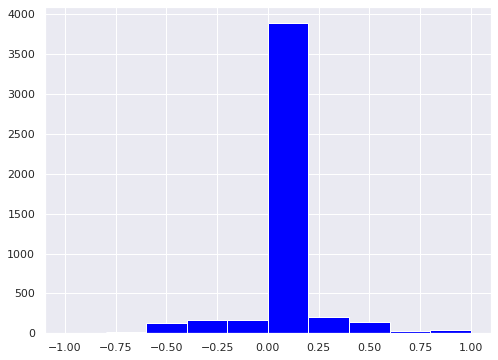

In [203]:
plt.figure(figsize = (8,6))
Data['Polarity'].hist(color = 'blue')

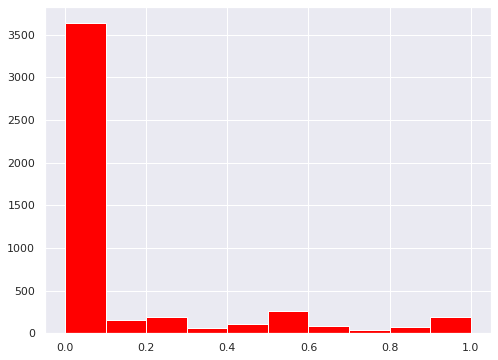

In [205]:
plt.figure(figsize = (8,6))
Data['Subjectivity'].hist(color = 'red')

In [207]:
sia = SentimentIntensityAnalyzer()

Data['Compound'] = [sia.polarity_scores(v)['compound'] for v in Data['headline_text']]
Data['Negative'] = [sia.polarity_scores(v)['neg'] for v in Data['headline_text']]
Data['Neutral'] = [sia.polarity_scores(v)['neu'] for v in Data['headline_text']]
Data['Positive'] = [sia.polarity_scores(v)['pos'] for v in Data['headline_text']]
Data

,Date,headline_text,sentiment,Open,High,Low,Close,Volume,score,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1443,2008-09-15,pregnant watch weight,0.333333,195.0,199.750000,186.25,190.149994,8550948.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.500000,0.333333,0.0000,0.000,1.000,0.000
1444,2008-09-15,two killed one injured mumbai hitandrun case,-0.200000,195.0,199.750000,186.25,190.149994,8550948.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,-0.200000,-0.8020,0.590,0.410,0.000
1445,2008-09-15,sridhar opts asian circuit,0.000000,195.0,199.750000,186.25,190.149994,8550948.0,"{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.000000,0.000000,0.0000,0.000,1.000,0.000
1446,2008-09-15,manuel almunia,0.000000,195.0,199.750000,186.25,190.149994,8550948.0,"{'neg': 0.667, 'neu': 0.333, 'pos': 0.0, 'comp...",0.000000,0.000000,0.0000,0.000,1.000,0.000
1447,2008-09-15,emmanuel adebayor,0.000000,195.0,199.750000,186.25,190.149994,8550948.0,"{'neg': 0.0, 'neu': 0.376, 'pos': 0.624, 'comp...",0.000000,0.000000,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6628,2008-09-30,3 held killing fruit stall owner,0.000000,148.0,169.175003,147.50,166.399994,8391372.0,NaN,0.000000,0.000000,-0.7351,0.674,0.326,0.000
6629,2008-09-30,draft law tightens norms,0.000000,148.0,169.175003,147.50,166.399994,8391372.0,NaN,0.000000,0.000000,0.0000,0.000,1.000,0.000
6631,2008-09-30,youngest sept 27 blast victim shifted aiims,-0.075000,148.0,169.175003,147.50,166.399994,8391372.0,NaN,0.050000,-0.075000,-0.2732,0.259,0.741,0.000
6632,2008-09-30,eu voice concern security threat pak,0.000000,148.0,169.175003,147.50,166.399994,8391372.0,NaN,0.000000,0.000000,-0.2500,0.347,0.408,0.245


In [208]:
#Deleting the score column
Data = Data.drop('score',axis=1)
Data.head()

,Date,headline_text,sentiment,Open,High,Low,Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1443,2008-09-15,pregnant watch weight,0.333333,195.0,199.75,186.25,190.149994,8550948.0,0.5,0.333333,0.000,0.00,1.00,0.0
1444,2008-09-15,two killed one injured mumbai hitandrun case,-0.200000,195.0,199.75,186.25,190.149994,8550948.0,0.0,-0.200000,-0.802,0.59,0.41,0.0
1445,2008-09-15,sridhar opts asian circuit,0.000000,195.0,199.75,186.25,190.149994,8550948.0,0.0,0.000000,0.000,0.00,1.00,0.0
1446,2008-09-15,manuel almunia,0.000000,195.0,199.75,186.25,190.149994,8550948.0,0.0,0.000000,0.000,0.00,1.00,0.0
1447,2008-09-15,emmanuel adebayor,0.000000,195.0,199.75,186.25,190.149994,8550948.0,0.0,0.000000,0.000,0.00,1.00,0.0


In [245]:
#Creating price_up column where 1 represents increase in stock and 0 represents decrease or remain unchanged
Data['price_up'] = np.where(Data['Close'].shift(-1)>Data['Close'],1,0)
Data.head()

,Date,headline_text,sentiment,Open,High,Low,Close,Volume,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,price_up
1443,2008-09-15,pregnant watch weight,0.333333,195.0,199.75,186.25,190.149994,8550948.0,0.5,0.333333,0.000,0.00,1.00,0.0,0
1444,2008-09-15,two killed one injured mumbai hitandrun case,-0.200000,195.0,199.75,186.25,190.149994,8550948.0,0.0,-0.200000,-0.802,0.59,0.41,0.0,0
1445,2008-09-15,sridhar opts asian circuit,0.000000,195.0,199.75,186.25,190.149994,8550948.0,0.0,0.000000,0.000,0.00,1.00,0.0,0
1446,2008-09-15,manuel almunia,0.000000,195.0,199.75,186.25,190.149994,8550948.0,0.0,0.000000,0.000,0.00,1.00,0.0,0
1447,2008-09-15,emmanuel adebayor,0.000000,195.0,199.75,186.25,190.149994,8550948.0,0.0,0.000000,0.000,0.00,1.00,0.0,0


#Modeling

In [247]:
#Splitting dataset into X and y
X = Data[['sentiment','Open','High','Low','Close','Volume','Compound','Positive','Negative','Neutral']]
y = Data['price_up']

In [248]:
#Splitting dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [249]:
print(X_train.shape)
print(X_test.shape)

(3364, 10)
(1442, 10)


In [250]:
#Grid search for obtimal parameters
parameters = [{'max_depth' : [10,20], 'n_estimators' : [10,20], 'max_features' : [10,20]}]
model = RandomForestClassifier()
clf = GridSearchCV(model,parameters,cv=5,scoring='roc_auc')
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 381, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py", line 572, in roc_auc_score
    sample_weight=sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 20], 'max_features': [10, 20],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [251]:
#Best parameters
clf.best_params_

{'max_depth': 10, 'max_features': 10, 'n_estimators': 10}

In [252]:
RandClass = RandomForestClassifier(n_estimators=10, max_features=10)
RandClass.fit(X_train,y_train)

RandomForestClassifier(max_features=10, n_estimators=10)


RandomForestClassifier(max_features=10, n_estimators=10)

In [253]:
#Classifier predict

In [255]:
y_pred = RandClass.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1442

    accuracy                           1.00      1442
   macro avg       1.00      1.00      1.00      1442
weighted avg       1.00      1.00      1.00      1442



In [256]:
metrics.accuracy_score(y_test,y_pred)

1.0